In [7]:
import os
import numpy as np
import cv2
import pandas as pd
from sklearn.model_selection import train_test_split

In [20]:
base_dir = "CUB_200_2011/images/"
data = []
labels = []

for folder_name in os.listdir(base_dir):
    folder_path = os.path.join(base_dir, folder_name)

    if os.path.isdir(folder_path):
        # loop through each image in the folder
        for img_name in os.listdir(folder_path):
            img_path = os.path.join(folder_path, img_name)

            # read the image using OpenCV in color
            img = cv2.imread(img_path, cv2.IMREAD_COLOR)  # now it loads in color (BGR format by default with OpenCV)
            if img is not None:
                # resize to a standard size if needed (optional)
                img = cv2.resize(img, (500, 500))  # replace with desired size

                # append the image data and label to our lists
                data.append(img)
                labels.append(folder_name)

data_np = np.array(data, dtype=np.float32)
labels_np = np.array(labels)

np.save("data.npy", data_np)
np.save("labels.npy", labels_np)

MemoryError: Unable to allocate 32.9 GiB for an array with shape (11788, 500, 500, 3) and data type float32

In [14]:
data = np.load('data.npy')
labels = np.load('labels.npy')

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.33, random_state=42)

In [16]:
X_train.shape

(7897, 64, 64, 3)

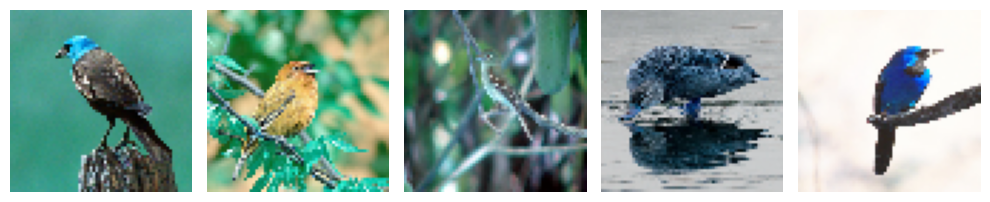

In [17]:
import matplotlib.pyplot as plt
# Randomly select 5 indices from the dataset
indices = np.random.choice(X_train.shape[0], 5, replace=False)

# Plot the 5 images
plt.figure(figsize=(10, 5))
for i, index in enumerate(indices, 1):
    plt.subplot(1, 5, i)
    plt.imshow(data[index])
    plt.axis('off')

plt.tight_layout()
plt.show()


In [18]:
np.unique(y_train)

array(['001.Black_footed_Albatross', '002.Laysan_Albatross',
       '003.Sooty_Albatross', '004.Groove_billed_Ani',
       '005.Crested_Auklet', '006.Least_Auklet', '007.Parakeet_Auklet',
       '008.Rhinoceros_Auklet', '009.Brewer_Blackbird',
       '010.Red_winged_Blackbird', '011.Rusty_Blackbird',
       '012.Yellow_headed_Blackbird', '013.Bobolink',
       '014.Indigo_Bunting', '015.Lazuli_Bunting', '016.Painted_Bunting',
       '017.Cardinal', '018.Spotted_Catbird', '019.Gray_Catbird',
       '020.Yellow_breasted_Chat', '021.Eastern_Towhee',
       '022.Chuck_will_Widow', '023.Brandt_Cormorant',
       '024.Red_faced_Cormorant', '025.Pelagic_Cormorant',
       '026.Bronzed_Cowbird', '027.Shiny_Cowbird', '028.Brown_Creeper',
       '029.American_Crow', '030.Fish_Crow', '031.Black_billed_Cuckoo',
       '032.Mangrove_Cuckoo', '033.Yellow_billed_Cuckoo',
       '034.Gray_crowned_Rosy_Finch', '035.Purple_Finch',
       '036.Northern_Flicker', '037.Acadian_Flycatcher',
       '038.Grea